<a href="https://colab.research.google.com/github/2303A52445/Generative-AI/blob/main/GAI_ass_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Evaluate the model on the training set
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on the testing set
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) #convert probabilities to binary values

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate recall, precision, and F1-score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1:.4f}')

Training Accuracy: 90.88%
Testing Accuracy: 70.78%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Confusion Matrix:
[[75 24]
 [21 34]]
Recall: 0.6182
Precision: 0.5862
F1-Score: 0.6018


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5466 - loss: 0.6948 - val_accuracy: 0.6753 - val_loss: 0.6125
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7157 - loss: 0.5696 - val_accuracy: 0.7273 - val_loss: 0.5419
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7602 - loss: 0.5137 - val_accuracy: 0.7662 - val_loss: 0.5174
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7612 - loss: 0.4899 - val_accuracy: 0.7987 - val_loss: 0.5076
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7791 - loss: 0.5013 - val_accuracy: 0.7857 - val_loss: 0.5054
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7657 - loss: 0.5016 - val_accuracy: 0.7662 - val_loss: 0.5103
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7850 - loss: 0.4709 - val_accuracy: 0.7338 - val_loss: 0.5135
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7818 - loss: 0.4642 - val_accuracy: 0.7338

Training Accuracy: 0.9087947607040405
Testing Accuracy: 0.7272727489471436
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Precision: 0.6181818181818182
Recall: 0.6181818181818182
F1-Score: 0.6181818181818182


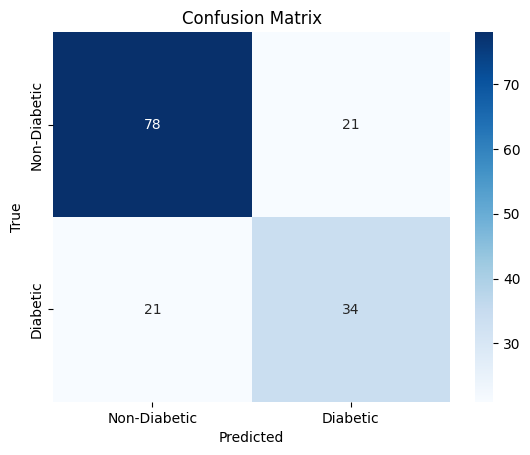

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Class (0: Non-Diabetic, 1: Diabetic): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the dataset (replace with the actual dataset path)
# Make sure to replace 'path_to_your_dataset.csv' with the actual path to your dataset.
dataset = pd.read_csv('/content/diabetes (1).csv')  # Load dataset

# Step 3: Preprocess the data
# Assuming 'Outcome' is the target variable (1 for diabetic, 0 for non-diabetic)
X = dataset.drop(columns=['Outcome'])  # Features
y = dataset['Outcome']  # Target variable

# Normalize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the ANN model
model = Sequential()

# Input layer and Hidden Layer 1 (10 neurons, tanh activation)
model.add(Dense(10, input_dim=X_train.shape[1], activation='tanh'))

# Hidden Layer 2 (15 neurons, tanh activation)
model.add(Dense(15, activation='tanh'))

# Hidden Layer 3 (20 neurons, tanh activation)
model.add(Dense(20, activation='tanh'))

# Hidden Layer 4 (10 neurons, tanh activation)
model.add(Dense(10, activation='tanh'))

# Hidden Layer 5 (5 neurons, tanh activation)
model.add(Dense(5, activation='tanh'))

# Output Layer (1 neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Step 5: Compile the model with Adam optimizer, accuracy metric, and binary crossentropy loss function
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the model (epochs=250, batch_size=32)
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the model on the test data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Output training and testing accuracy
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

# Step 8: Save the model to a .h5 file
model.save('diabetes_diagnosis_model.h5')

# Step 9: (Evaluation) Calculate confusion matrix and classification metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Step 10: (Deployment) Load the saved model for future predictions
from keras.models import load_model

# Load the saved model
loaded_model = load_model('diabetes_diagnosis_model.h5')

# Example prediction on new data
# Replace these placeholder values with actual values for a new patient
# The number of values here should match the number of features (e.g., 10 values for 10 features)
# Example prediction on new data
# Replace these placeholder values with actual values for a new patient
# The number of values here should match the number of features (e.g., 8 values for 8 features)

new_data = [[5.1, 3.5, 1.4, 0.2, 6.0, 3.0, 4.5, 1.5]]  # Replace with actual new feature values (8 features)

# Scale the new data using the same scaler used during training
new_data = scaler.transform(new_data)

# Make the prediction
predicted_outcome = loaded_model.predict(new_data)

# Convert the prediction to 0 or 1 (Diabetic or Non-Diabetic)
predicted_class = (predicted_outcome > 0.5).astype(int)

# Print the predicted class (0: Non-Diabetic, 1: Diabetic)
print(f'Predicted Class (0: Non-Diabetic, 1: Diabetic): {predicted_class[0][0]}')